In [1]:
import os
import numpy as np
from glob import glob
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image

In [2]:
i = 1
print(i)
data = []


1


In [3]:

for i in range(1,1176):
    path_x = np.load('D:/phd08-conversion-master/phd08_npy_results/phd08_data_%d.npy' %i)
    data.append(path_x)
    # data = np.concatenate((data, path_x), axis = 0)
#
# train = np.concatenate([path_x])

In [4]:
data = np.array(data)


In [5]:
data = data.reshape(-1, 28, 28)
path_x = np.concatenate((path_x, data), axis = 0)

In [6]:
labels = []
for i in range(1,1176):
    path_y = np.load('D:/phd08-conversion-master/phd08_npy_results/phd08_labels_%d.npy' %i)
    labels.append(path_y)

In [7]:
labels = np.array(labels)


In [8]:
print(labels.shape)
labels = labels.reshape(-1)
path_y = np.concatenate((path_y, labels), axis = 0)

(1175, 4374)


In [9]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(path_x,
                                                    path_y,
                                                    test_size = 0.1,
                                                    stratify=path_y,
                                                    random_state=2)

print("x_train shape",X_train.shape)
print("y_train shape",Y_train.shape)

print("x_test shape",X_test.shape)
print("y_test shape",Y_test.shape)

x_train shape (4629441, 28, 28)
y_train shape (4629441,)
x_test shape (514383, 28, 28)
y_test shape (514383,)


In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [11]:
print(X_train.shape)
print(X_test.shape)

(4629441, 28, 28, 1)
(514383, 28, 28, 1)


In [12]:
model = tf.keras.Sequential([
    # input_shape(행, 열, 채널 수) / 채널 수 = 흑백 영상 : 1, 컬러 영상 : 3
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2350, activation=tf.nn.softmax)
])

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics = ["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [13]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

history =  model.fit(X_train, Y_train,
                    epochs = 1000,
                    validation_data = (X_test, Y_test),
                    batch_size = 28,
                    callbacks=[es])

Epoch 1/1000
165338/165338 [==============================] - 1553s 9ms/step - loss: 3.2101 - accuracy: 0.1849 - val_loss: 1.7510 - val_accuracy: 0.4407
Epoch 2/1000
165338/165338 [==============================] - 1528s 9ms/step - loss: 2.3114 - accuracy: 0.3273 - val_loss: 1.3726 - val_accuracy: 0.5427
Epoch 3/1000
165338/165338 [==============================] - 1546s 9ms/step - loss: 2.2078 - accuracy: 0.3567 - val_loss: 1.3658 - val_accuracy: 0.5492
Epoch 4/1000
165338/165338 [==============================] - 1570s 9ms/step - loss: 2.2564 - accuracy: 0.3542 - val_loss: 1.3588 - val_accuracy: 0.5495
Epoch 5/1000
165338/165338 [==============================] - 1550s 9ms/step - loss: 2.2894 - accuracy: 0.3522 - val_loss: 1.5836 - val_accuracy: 0.5068
Epoch 6/1000
165338/165338 [==============================] - 1556s 9ms/step - loss: 2.3083 - accuracy: 0.3542 - val_loss: 1.3539 - val_accuracy: 0.5621
Epoch 7/1000
165338/165338 [==============================] - 1554s 9ms/step - los

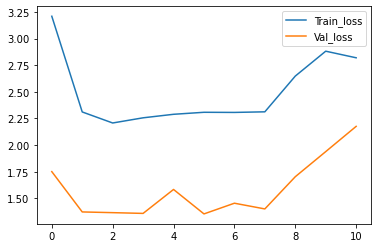

In [14]:
#plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train_loss")
plt.plot(history.history["val_loss"], label="Val_loss")
plt.legend()


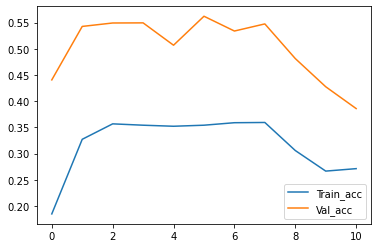

In [15]:
#plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Val_acc")
plt.legend()




In [16]:
model.evaluate(X_test, Y_test)

16075/16075 [==============================] - 52s 3ms/step - loss: 2.1761 - accuracy: 0.3859


[2.176060438156128, 0.38590505719184875]

In [17]:

preds = model.predict_classes(X_test)
preds
#plt.imshow(preds[0])


C:\Users\tqkqh\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2057, 1685, 1623, ..., 1883, 1629,  320], dtype=int64)

In [18]:
Y_test

array([2041, 1640, 1623, ..., 1885, 1622,  321])

In [19]:
accuracy= 0

for i in range(len(Y_test)):
    if(Y_test[i]== preds[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(Y_test))


accuracy:  0.38590505518261686


(514383,)


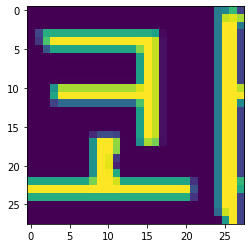

In [20]:
print(preds.shape)
plt.imshow(X_test[9])

In [21]:
from PIL import Image
image_path = 'D:/img/test04.png'
image = Image.open(image_path)
image

In [22]:
resize = image.resize((28, 28))
m = np.asarray(resize)
m.shape

(28, 28, 3)

In [23]:
bw = np.asarray(resize.convert('L'))
bw = np.asarray(bw, dtype = float)
bw.shape

(28, 28)

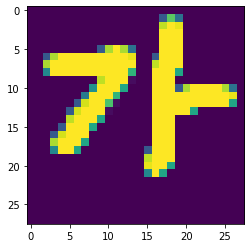

In [24]:
bw = bw.reshape(-1,28,28,1)
plt.imshow(bw[0])
plt.show()

In [25]:
preds = model.predict_classes(bw)
preds

array([23], dtype=int64)

0


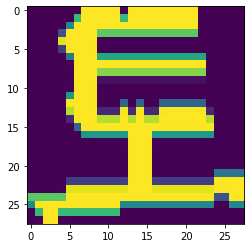

In [26]:
answer = np.argmax(preds[0])
print(answer)
plt.imshow(X_test[answer])

In [27]:
plt.show()